<a href="https://colab.research.google.com/github/camilletulipe06-wq/Quantitative-Methods-2---Research-Project/blob/main/Part_3_coding_(DiD_approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving QM 2 projects data.xlsx to QM 2 projects data.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

path = "QM 2 projects data.xlsx"
egy = pd.read_excel(path, sheet_name="data for egypt")


egy = egy.rename(columns={
    "secondary school completion rate": "education",
    "maternal mortality": "mmr",
    "income level": "income_level"
})


egy["year"] = pd.to_numeric(egy["year"], errors="coerce")
egy["education"] = pd.to_numeric(egy["education"], errors="coerce")
egy["mmr"] = pd.to_numeric(egy["mmr"], errors="coerce")


egy = egy.dropna(subset=["year", "mmr"]).sort_values("year").copy()


egy["ln_mmr"] = np.log(egy["mmr"])


egy["post2018"] = (egy["year"] >= 2018).astype(int)


egy["t"] = egy["year"] - egy["year"].min()


egy["t_post"] = egy["t"] * egy["post2018"]

egy.head()


,country,year,education,mmr,income_level,ln_mmr,post2018,t,t_post
0,Egypt,1985,NaN,141.0,1,4.948760,0,0,0
1,Egypt,1986,NaN,135.0,1,4.905275,0,1,0
2,Egypt,1987,NaN,128.0,1,4.852030,0,2,0
3,Egypt,1988,NaN,121.0,1,4.795791,0,3,0
4,Egypt,1989,NaN,114.0,1,4.736198,0,4,0


In [ ]:
egy_raw = pd.read_excel(path, sheet_name="data for egypt")
print("Rows in raw sheet:", len(egy_raw))
print(egy_raw.head())
print(egy_raw.tail())


Rows in raw sheet: 40
  country  year secondary school completion rate  maternal mortality  \
0   Egypt  1985                              NaN               141.0   
1   Egypt  1986                              NaN               135.0   
2   Egypt  1987                              NaN               128.0   
3   Egypt  1988                              NaN               121.0   
4   Egypt  1989                              NaN               114.0   

   income level  
0             1  
1             1  
2             1  
3             1  
4             1  
   country  year secondary school completion rate  maternal mortality  \
35   Egypt  2020                        78.427115                31.0   
36   Egypt  2021                        82.720678                42.0   
37   Egypt  2022                               ..                24.0   
38   Egypt  2023                        85.522091                17.0   
39   Egypt  2024                        85.691257                 NaN   

In [ ]:
egy = pd.read_excel(path, sheet_name="data for egypt").rename(columns={
    "secondary school completion rate": "education",
    "maternal mortality": "mmr"
})

egy["year"] = pd.to_numeric(egy["year"], errors="coerce")
egy["education"] = pd.to_numeric(egy["education"], errors="coerce")
egy["mmr"] = pd.to_numeric(egy["mmr"], errors="coerce")

print("Rows after load:", len(egy))

egy = egy.dropna(subset=["year","mmr"]).sort_values("year").copy()
print("Rows after dropna(year,mmr):", len(egy))

egy["ln_mmr"] = np.log(egy["mmr"])
egy["post2018"] = (egy["year"] >= 2018).astype(int)
egy["t"] = egy["year"] - egy["year"].min()
egy["t_post"] = egy["t"] * egy["post2018"]

egy.tail(10)


Rows after load: 40
Rows after dropna(year,mmr): 39


,country,year,education,mmr,income level,ln_mmr,post2018,t,t_post
29,Egypt,2014,71.355739,26.0,1,3.258097,0,29,0
30,Egypt,2015,NaN,24.0,1,3.178054,0,30,0
31,Egypt,2016,75.867548,23.0,1,3.135494,0,31,0
32,Egypt,2017,74.384048,21.0,1,3.044522,0,32,0
33,Egypt,2018,75.385068,20.0,1,2.995732,1,33,33
34,Egypt,2019,78.565902,19.0,1,2.944439,1,34,34
35,Egypt,2020,78.427115,31.0,1,3.433987,1,35,35
36,Egypt,2021,82.720678,42.0,1,3.737670,1,36,36
37,Egypt,2022,NaN,24.0,1,3.178054,1,37,37
38,Egypt,2023,85.522091,17.0,1,2.833213,1,38,38


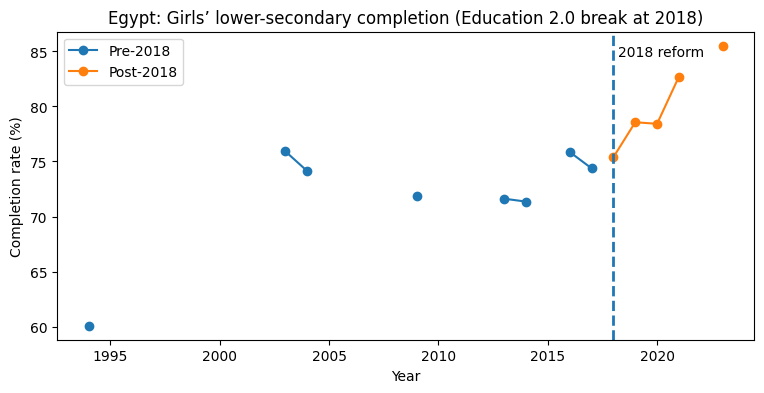

In [ ]:
plt.figure(figsize=(9,4))

pre = egy[egy["year"] < 2018]
post = egy[egy["year"] >= 2018]

plt.plot(pre["year"], pre["education"], marker="o", label="Pre-2018")
plt.plot(post["year"], post["education"], marker="o", label="Post-2018")

plt.axvline(2018, linestyle="--", linewidth=2)
plt.text(2018+0.2, np.nanmax(egy["education"]), "2018 reform", va="top")

plt.title("Egypt: Girls’ lower-secondary completion (Education 2.0 break at 2018)")
plt.xlabel("Year")
plt.ylabel("Completion rate (%)")
plt.legend()
plt.show()


In [ ]:
edu_its = smf.ols("education is ~ t + post2018 + t_post", data=egy).fit(cov_type="HAC", cov_kwds={"maxlags":2})
print(edu_its.summary())


                            OLS Regression Results                            
Dep. Variable:              education   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     771.7
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           3.62e-11
Time:                        18:56:13   Log-Likelihood:                -32.216
No. Observations:                  13   AIC:                             72.43
Df Residuals:                       9   BIC:                             74.69
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.8564      4.334     14.271      0.0

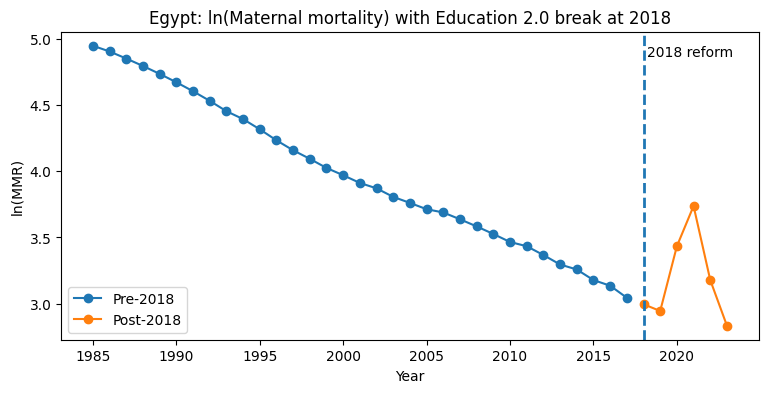

In [ ]:
plt.figure(figsize=(9,4))

plt.plot(pre["year"], pre["ln_mmr"], marker="o", label="Pre-2018")
plt.plot(post["year"], post["ln_mmr"], marker="o", label="Post-2018")

plt.axvline(2018, linestyle="--", linewidth=2)
plt.text(2018+0.2, np.nanmax(egy["ln_mmr"]), "2018 reform", va="top")

plt.title("Egypt: ln(Maternal mortality) with Education 2.0 break at 2018")
plt.xlabel("Year")
plt.ylabel("ln(MMR)")
plt.legend()
plt.show()


The post-2018 trend is interrupted by the COVID-19 shock: a record-based Egyptian study reports that “the national MMR increased from 44.1 (pre-COVID-19) to 55.9 (post-COVID-19)” and that COVID-19 was “diagnosed in 25.3%” of maternal deaths.(2025). This supports treating 2020–2021 as an external crisis period that adds noise to the reform-time comparison rather than evidence that Education 2.0 worsened maternal outcomes.

In [ ]:
mmr_its = smf.ols("ln_mmr ~ t + post2018 + t_post", data=egy).fit(cov_type="HAC", cov_kwds={"maxlags":2})
print(mmr_its.summary())


                            OLS Regression Results                            
Dep. Variable:                 ln_mmr   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1165.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           4.11e-35
Time:                        13:11:47   Log-Likelihood:                 24.859
No. Observations:                  39   AIC:                            -41.72
Df Residuals:                      35   BIC:                            -35.06
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9257      0.022    225.443      0.0

In [ ]:
import statsmodels.formula.api as smf

BREAK = 2018

egy_reg = egy.dropna(subset=["year","ln_mmr"]).copy().sort_values("year")
egy_reg["t"] = egy_reg["year"] - int(egy_reg["year"].min())
egy_reg["post2018"] = (egy_reg["year"] >= BREAK).astype(int)
egy_reg["t_post"] = egy_reg["t"] * egy_reg["post2018"]
egy_reg["covid"] = egy_reg["year"].between(2020, 2021).astype(int)

its = smf.ols("ln_mmr ~ t + post2018 + t_post + covid", data=egy_reg)\
         .fit(cov_type="HAC", cov_kwds={"maxlags":2})
print(its.summary())


                            OLS Regression Results                            
Dep. Variable:                 ln_mmr   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1177.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           6.22e-36
Time:                        12:15:44   Log-Likelihood:                 51.664
No. Observations:                  39   AIC:                            -93.33
Df Residuals:                      34   BIC:                            -85.01
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9257      0.022    225.443      0.0

In [ ]:
pred_df = egy_reg.copy()
pred_df["fit_with_covid"] = its.predict(pred_df)

pred_df_nocovid = pred_df.copy()
pred_df_nocovid["covid"] = 0
pred_df["fit_no_covid"] = its.predict(pred_df_nocovid)


beta used: -0.08517701826011542


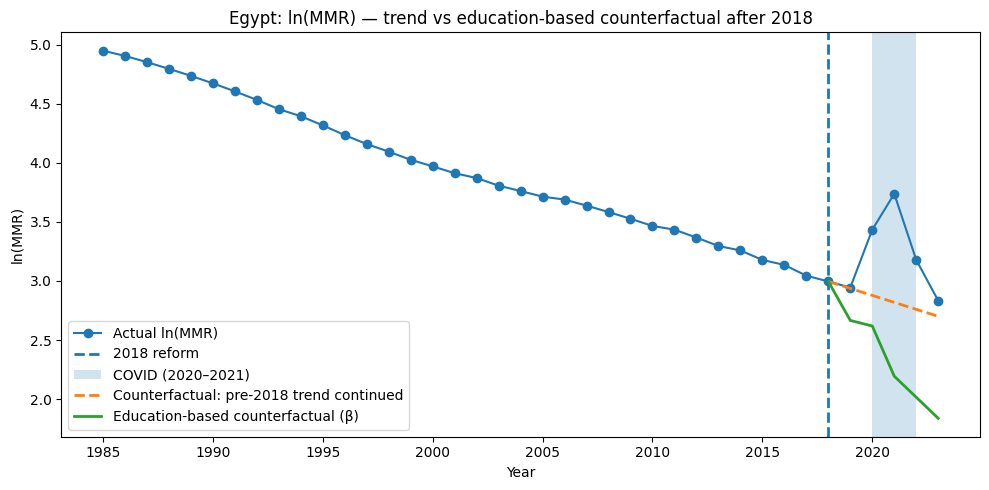

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BREAK = 2018

egy_plot = egy.dropna(subset=["year","ln_mmr"]).copy().sort_values("year")

egy_plot["education_i"] = egy_plot["education"].interpolate(limit_direction="both")

pre = egy_plot[egy_plot["year"] < BREAK].copy()
post = egy_plot[egy_plot["year"] >= BREAK].copy()


delta, a = np.polyfit(pre["year"].values, pre["ln_mmr"].values, 1)




tmp = pre.dropna(subset=["education_i"])
beta, alpha = np.polyfit(tmp["education_i"].values, tmp["ln_mmr"].values, 1)



print("beta used:", beta)


ln_2018 = float(egy_plot.loc[egy_plot["year"] == BREAK, "ln_mmr"].iloc[0])
edu_2018 = float(egy_plot.loc[egy_plot["year"] == BREAK, "education_i"].iloc[0])


years = post["year"].values
edu = post["education_i"].values


ln_cf_trend = ln_2018 + delta*(years - BREAK)


ln_cf_edu = ln_cf_trend + beta*(edu - edu_2018)


beta_opt = 1.5 * beta
ln_cf_edu_opt = ln_cf_trend + beta_opt*(edu - edu_2018)


plt.figure(figsize=(10,5))
plt.plot(egy_plot["year"], egy_plot["ln_mmr"], marker="o", linewidth=1.5, label="Actual ln(MMR)")
plt.axvline(BREAK, linestyle="--", linewidth=2, label="2018 reform")
plt.axvspan(2020, 2021.99, alpha=0.2, label="COVID (2020–2021)")

plt.plot(years, ln_cf_trend, linestyle="--", linewidth=2, label="Counterfactual: pre-2018 trend continued")
plt.plot(years, ln_cf_edu, linestyle="-", linewidth=2, label="Education-based counterfactual (β)")


plt.title("Egypt: ln(MMR) — trend vs education-based counterfactual after 2018")
plt.xlabel("Year")
plt.ylabel("ln(MMR)")
plt.legend()
plt.tight_layout()
plt.show()


REGRESSION TABLE FOR GREEN LINE

In [ ]:
import numpy as np
import statsmodels.formula.api as smf

BREAK = 2018
egy = egy.sort_values("year").copy()

egy["t"] = egy["year"] - egy["year"].min()
egy["post2018"] = (egy["year"] >= BREAK).astype(int)
egy["t_post"] = egy["t"] * egy["post2018"]
egy["covid"] = egy["year"].between(2020, 2021).astype(int)

df = egy.dropna(subset=["ln_mmr", "education"]).copy()

edu_model = smf.ols(
    "ln_mmr ~ t + post2018 + t_post + education + education:post2018 + covid",
    data=df
).fit(cov_type="HAC", cov_kwds={"maxlags":2})

print(edu_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 ln_mmr   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           5.89e-12
Time:                        13:18:21   Log-Likelihood:                 24.784
No. Observations:                  13   AIC:                            -35.57
Df Residuals:                       6   BIC:                            -31.61
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.2728      0

To add depth to Part 3, we used an Interrupted Time Series (ITS) / DiD-inspired approach for Egypt to test whether the 2018 “Education 2.0” reform marks a structural break in maternal mortality trends. The goal is not to claim perfect causality, but to strengthen our overall argument that improvements in girls’ schooling can translate into better maternal outcomes while also recognising that major shocks (especially COVID-19) can temporarily distort the pattern. First, we estimate a baseline ITS model for ln(MMR) with a time trend (t), a post-2018 dummy (Post2018), and a post-2018 trend change (t_post). This produces a fitted post-2018 trend line; however, that line reflects only how the time trend changes after 2018 (post-slope = γ + δ), and if δ is positive it can look “flatter,” because it is not an education-driven prediction. To connect the reform more directly to our education mechanism, we then build a scenario-based “education-driven counterfactual” where education enters the prediction:

ln(MMR)=baseline+time trend+education effect+post-2018 shift+COVID shock+error

Replaced with equation values :

ln(MMR_t) = α + γt + βEdu_t + θPost2018_t + ϕ(Edu_t×Post2018_t) + κCovid_t + u_t.

We interpret this model under clear assumptions: education reduces maternal mortality through knowledge/empowerment and health-service use; effects may appear with a short lag; aside from COVID the underlying drivers follow their pre-2018 trend; and 2020–2021 are treated as a temporary shock period. Finally, we plot a “no-COVID” counterfactual by setting Covid_t = 0, and compare it to observed data to show how much of the post-2018 deviation is consistent with pandemic disruption rather than the reform’s underlying direction.
